In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 토픽 모델링(Topic Modeling)

### 토픽 모델링이란?
- 문서 집합에 숨어 있는 추상적인 주제를 발견하기 위한 통계적 모델
    - 많은 문서에서 주요 주제를 효과적으로 찾아낼 수 있음
- Topic : 어떤 주제를 구성하는 단어들
- 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출함
    - 특정 주제에 관한 문헌에는 그 주제에 관한 단어가 다른 단어들에 비해 더 자주 등장할 것이므로
    - 문헌 내에 어떤 주제가 들어있고, 주제 간의 비중이 어떤지를 문헌 집합 내의 단어 통계를 수학적으로 분석함으로 알아냄
- 일종의 word-level semantic clustering

### 토픽 모델링 기법

- LSA(Latent Semantic Analysis)
- LDA(Latent Dirichlet Allocation: 잠재 디리클레 할당)

#### LSA(Latent Semantic Analysis)
- 분포 의미론에서 문서 및 용어와 관련된 개념 집합을 생성하여 문서 집합과 해당 문서에 포함된 용어 간의 관계를 분석하는 기술
- 의미가 유사한 단어가 유사한 텍스트 부분에 나타날 것이라고 가정한다(분포 가설)
- 알고리즘 주요 내용
    - 문서당 단어 수를 포함하는 행렬(행은 고유한 단어를 나타내고 열은 각 문서를 나타냄)은 큰 텍스트 조각으로 구성되며 특잇값 분해(SVD)라는 수학적 기법을 사용하여 유사성 구조를 유지하면서 열 중에서 행 수를 줄인다
    - 두 열 간의 코사인 유사성을 기준으로 문서를 비교한다
    - 1에 가까운 값은 매우 유사한 문서를 나타내고, 0에 가까운 값은 매우 다른 문서를 나타낸다
- 잠재 의미 구조를 이용한 정보 검색 기술에 활용
    - LSI(Latent Semantic Indexing)라고도 부름

#### LDA(Latent Dirichlet Allocation: 잠재 디리클레 할당)

- 2002, 데이비드 블라이(David Blei), 앤드류 응(Andrew Ng), 마이클 어윈 조던(Michael I. Jordan)
- 미리 알고 있는 주제별 **`단어수 분포`** 를 바탕으로 주어진 문서에서 발견된 단어수 분포를 분석함으로써 해당 문서가 어떤 주제들을 함께 다루고 있을지를 예측
- 확률적 토픽 모델 기법 중 하나 : 이산 자료들에 대한 확률적 생성 모형

#### LDA의 주요한 가정
- 문서는 여러 개의 토픽을 지닐 수 있고 한 문서는 특정 토픽을 얼마나 지녔는지의 확률 벡터로 표현된다
    - $P(t|d)$ , $t$는 토픽, $d$는 문서
- 하나의 토픽은 해당 토픽에서 이용되는 단어의 비율로 표현된다
    - 각 토픽 별 단어의 생성 활률 분포식 : $P(w|t)$, $w$는 단어
        - 토픽  $t$마다 단어 $w$가 얼마나 자주 등장하는지에 대한 확률분포 
- 한 문서에서 특정 단어들이 이용될 가능성은 위의 두 확률 분포의 곱으로 표현된다
    - $ \prod_i P(w_i | t_i )P(t_i | d) $
    - 토픽 $t$의 분포를 모르기 때문에 이를 추정해야 하므로, $P(w|t)$를 학습함          
- 단어의 교환성(exchangeability) : 단어들의 순서는 상관하지 않고 오로지 단어들의 유무만 중요하다는 가정
- 특정 단어들의 묶음을 한 단위로 생각하는 방식(n-gram)으로 LDA의 교환성 가정을 확장시킬 수도 있음

#### LDA 이해하기

예. 다음의 문서 집합에서 2개의 토픽 찾기

- 문서1 : 저는 사과랑 바나나를 먹어요
- 문서2 : 우리는 귀여운 강아지가 좋아요
- 문서3 : 저의 깜찍하고 귀여운 강아지가 바나나를 먹어요

- LDA 입력 전에 주어와 불필요한 조사 등을 제거하는 전처리 과정을 거쳤다고 가정하고 각 문서의 토픽 분포와 단어분포를 추정
    - 각 토픽의 단어 분포
        - 토픽A : **사과20%, 바나나 40%, 먹어요 40%** , 귀여운  0%, 강아지  0%, 깜찍하고  0%, 좋아요  0%
        - 토픽B : 사과 0%, 바나나  0%, 먹어요  0%, **귀여운 33%, 강아지 33%, 깜찍하고 16%, 좋아요 16%**
    - 각 문서의 토픽 분포
        - 문서1 : 토픽A 100%
        - 문서2 : 토픽B 100%
        - 문서3 : 토픽B 60%, 토픽A 40%    

#### LDA 수행알고리즘 이해

1. 사용자는 알고리즘에게 토픽의 개수 k를 알려줌
    - k개 토픽이 M개의 전체 문서에 걸쳐 분포되어 있다고 가정함 
2. 모든 단어를 k개 중 하나의 토픽에 할당함
    - LDA는 모든 문서의 모든 단어에 대해서 k개 중 하나의 토픽을 랜덤으로 할당함
    - 이 작업이 끝나면 각 문서는 토픽을 가지면 토픽은 단어 분포를 가지는 상태가 됨(랜덤으로 할당, 각 단어는 서로 다른 토픽에 할당되었을 수도 있음)
3. 모든 문서의 모든 단어에 대해서 다음의 사항을 반복 수행
    - 어떤 문서의 각 단어 w는 자신은 잘못된 토픽에 할당되어져 있지만, 다른 단어들은 전부 올바른 토픽에 할당되어 있는 상태라고 가정하며, 단어 w는 다음 두 기준에 따라 토픽이 재할당됨
        - $P(t|d)$ : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
        - $p(w|t)$ : 각 토픽들 t에서 해당 단어 w 분포

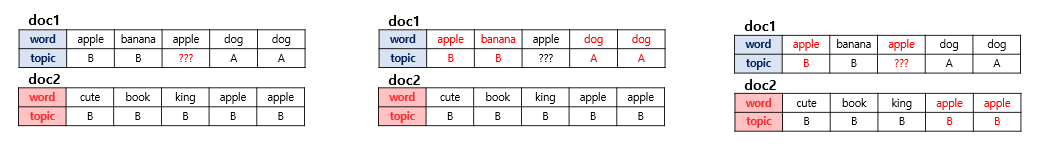

- [첫번째 그림] doc1의 세번째 단어인 apple의 토픽을 결정하려고 함
- [두번째 그림] 첫번째 사용 기준 : doc1의 단어들이 어떤 토픽에 해당하는지 확인
    - 토픽A와 토픽B 비중이 50 대 50비율 => apple은 토픽A와 토픽B 어디에도 속할 가능성이 있음
- [세번째 그림] 두번째 사용 기준 : apple 단어가 전체 문서에서 어떤 토픽에 할당되었는지 확인
    - apple는 토픽B에 할당될 가능성이 높음
- LDA는 첫번째 기준과 두번째 기준을 참고하여 doc1의 apple을 어떤 토픽에 할당할지 결정

#### LSA와 LDA 차이점
- LSA : DTM을 차원 축소하여 축소 차원에서 근접 단어들을 토픽으로 묶어줌
- LDA : 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합확률로 추정하여 토픽 추출함

#### LDA 토픽 모델링 패키지
- gensim
- 사이킷런 : **`LatentDirichletAllocation` 클래스**

#### LDA 응용
- 문헌의 주제를 찾기 위한 방법으로 고안되었지만, 이미지, 소리 등 텍스트 처리 이외의 다양한 분야에 쓰일 수 있음
- 이산 자료들, 즉 불연속적인 자료들뿐만 아니라 연속적인 자료들에 대해서 적용 할 수 있고 또한 다항 분포가 아닌 자료들에 대해서도 적용 할 수 있는 가능성이 있음

### LDA 실습1. 

- 데이터셋 : 사이킷런의 샘플데이터 20뉴스그룹 데이터

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#### 데이터 로딩

In [4]:
news = fetch_20newsgroups(subset='all', random_state= 156)
print(news.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
cats = ['comp.graphics', 'comp.windows.x', 'rec.motorcycles', 'rec.sport.baseball', 
       'sci.electronics', 'sci.med', 'soc.religion.christian', 'talk.politics.mideast']
news = fetch_20newsgroups(subset='all', remove= ('headers','footer','quotes') , 
                          categories = cats, random_state= 156)
print(news.target_names)

['comp.graphics', 'comp.windows.x', 'rec.motorcycles', 'rec.sport.baseball', 'sci.electronics', 'sci.med', 'soc.religion.christian', 'talk.politics.mideast']


In [9]:
len(news.data)

7862

#### 데이터 벡터화

In [11]:
cnt = CountVectorizer(max_df = 0.95, max_features= 1000, 
                      min_df= 2, stop_words='english',ngram_range= (1,2))
ftr_vect = cnt.fit_transform(news.data)
print(ftr_vect.shape)

(7862, 1000)


#### 토픽 모델링

**LDA 토픽 모델링 수행**
- LatentDirichletAllocation 객체 생성 후 fit()으로 피처 벡터화된 데이터 세트에 대핸 토픽 모델링
- n_components 파라미터
    - 토픽 개수 = 뉴스그룹에서 추출한 주제와 동일한 8개
- random_state=0
    - 수행할 때 마다 결과가 같게 하기 위해

In [12]:
lda = LatentDirichletAllocation(n_components= 8, random_state=0)
lda.fit(ftr_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

**LatentDirichletAllocation 객체 속성 `components_`**
- 개별 토픽별로 각 word 피처가 얼마나 많이 토픽에 할당됐는지에 대한 수치

In [14]:
lda.components_.shape

(8, 1000)

**display_topics(model, feature_names, n_top_words)**
- components_ 배열의 값만으로는 각 토픽별 word 연관도를 보기어려우므로 각 토픽별 연관도가 높은 순으로 word를 나열하는 함수 생성

In [ ]:
def display_topics(model, feature_names, n_top_words= 10):
    for idx, topic in enumerate(model.components_):
        topic_word_idx = topic.argsort()[::-1]
        top_idx = topic_word_idx[:n_top_words]
        top_words_text= ' '.join([feature_names[i] for i in top_idx])
        print(f'Topic {idx+1}: {top_words_text}')

In [24]:
# get_feature_names_out ->  CountVectorizer가 추출한 단어들의 리스트 추출
ftr_names = cnt.get_feature_names_out()
ftr_names.shape
display_topics(lda, ftr_names, 15)

Topic 1: like don just good think ve time know use make better way really dod bike
Topic 2: dos dos dos medical health research software 10 cancer 1993 use information number windows disease patients
Topic 3: file image jpeg gif program color output files images format entry bit 00 __ 03
Topic 4: said people know didn don went just did told came like time say going saw
Topic 5: edu com mail thanks university know email phone new does information fax internet computer cs
Topic 6: god people think jesus church does believe christ say know christian don just christians like
Topic 7: armenian israel turkish jews people armenians israeli jewish armenia government turks war arab turkey 000
Topic 8: edu window graphics available server use ftp file com version display using pub program motif


In [22]:
print(cats)

['comp.graphics', 'comp.windows.x', 'rec.motorcycles', 'rec.sport.baseball', 'sci.electronics', 'sci.med', 'soc.religion.christian', 'talk.politics.mideast']


### LDA 실습2.

- 데이터셋 : 약15년 동안 발행되었던 ABC 뉴스기사 제목 데이터
    - https://www.kaggle.com/therohk/million-headlines

#### 데이터 로딩

In [ ]:
import urllib.request
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
url = 'https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/19.%20Topic%20Modeling%20(LDA%2C%20BERT-Based)/dataset/abcnews-date-text.csv'

urllib.request.urlretrieve(url, 'abcnews.csv')

('abcnews.csv', <http.client.HTTPMessage at 0x1e700d35b10>)

In [29]:
abcnews = pd.read_csv('abcnews.csv', on_bad_lines= 'error')
len(abcnews)

1082168

In [30]:
abcnews.head(3)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit


In [32]:
news_text = abcnews[['headline_text']]
news_text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


#### 텍스트 전처리

- 단어 토큰화

In [33]:
news_text['headline_text'] = [nltk.word_tokenize(item) for item in news_text['headline_text']]
news_text.head()

,headline_text
0,"[aba, decides, against, community, broadcastin..."
1,"[act, fire, witnesses, must, be, aware, of, de..."
2,"[a, g, calls, for, infrastructure, protection,..."
3,"[air, nz, staff, in, aust, strike, for, pay, r..."
4,"[air, nz, strike, to, affect, australian, trav..."


- 불용어 제거

In [34]:
stop_words = stopwords.words('english')
news_text['headline_text'] = news_text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])
news_text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


- 표제어 추출
    - 3인칭 단수 표현을 1인칭으로, 과거 현재형동사를 현재형으로 변경

In [35]:
news_text['headline_text'] = news_text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
news_text.head()

,headline_text
0,"[aba, decide, community, broadcast, licence]"
1,"[act, fire, witness, must, aware, defamation]"
2,"[g, call, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


- 길이가 3이하인 단어 제거

In [36]:
news_text['headline_text'] = news_text['headline_text'].apply(lambda x: [word for word in x if len(word) >3])
news_text.head()

,headline_text
0,"[decide, community, broadcast, licence]"
1,"[fire, witness, must, aware, defamation]"
2,"[call, infrastructure, protection, summit]"
3,"[staff, aust, strike, rise]"
4,"[strike, affect, australian, travellers]"


#### TF-IDF 벡터화

- 1000개 단어로 제한하여 생성

- 역토큰화

In [38]:
docs_list = []
for i in range(len(news_text['headline_text'])):
    doc = news_text['headline_text'][i]
    docs_list.append(' '.join([token for token in doc]))
docs_list[:10]

['decide community broadcast licence',
 'fire witness must aware defamation',
 'call infrastructure protection summit',
 'staff aust strike rise',
 'strike affect australian travellers',
 'ambitious olsson triple jump',
 'antic delight record break barca',
 'aussie qualifier stosur waste four memphis match',
 'aust address security council iraq',
 'australia lock timetable']

- TF-IDF 벡터화

In [42]:
tf = TfidfVectorizer(stop_words='english', max_features= 1000)
ftr_mat = tf.fit_transform(docs_list)
print(f'TFIDF 피처벡터 크기: {ftr_mat.shape}')

TFIDF 피처벡터 크기: (1082168, 1000)


#### 토픽 모델링

In [43]:
lda_model = LatentDirichletAllocation(n_components= 10, learning_method='online',
                                     random_state= 777, max_iter=1)
lda_topic = lda_model.fit_transform(ftr_mat)

In [44]:
print(f'LDA 모델 컴포넌트:\n{lda_model.components_}')
print(f'LDA 모델 컴포넌트 크기: {lda_model.components_.shape}')

LDA 모델 컴포넌트:
[[1.00001533e-01 1.00001269e-01 1.00004179e-01 ... 1.00006124e-01
  1.00003111e-01 1.00003064e-01]
 [1.00001199e-01 1.13513398e+03 3.50170830e+03 ... 1.00009349e-01
  1.00001896e-01 1.00002937e-01]
 [1.00001811e-01 1.00001151e-01 1.00003566e-01 ... 1.00002693e-01
  1.00002061e-01 7.53381835e+02]
 ...
 [1.00001065e-01 1.00001689e-01 1.00003278e-01 ... 1.00006721e-01
  1.00004902e-01 1.00004759e-01]
 [1.00002401e-01 1.00000732e-01 1.00002989e-01 ... 1.00003517e-01
  1.00001428e-01 1.00005266e-01]
 [1.00003427e-01 1.00002313e-01 1.00007340e-01 ... 1.00003732e-01
  1.00001207e-01 1.00005153e-01]]
LDA 모델 컴포넌트 크기: (10, 1000)


- 단어 집합

In [ ]:
# topic = lda.components_ -> 가중치를 적용하여 topic 비중
def display_topics(model, feature_names, n_top_words= 10):
    for idx, topic in enumerate(model.components_):
        topic_word_idx = topic.argsort()[::-1]
        top_idx = topic_word_idx[:n_top_words]
        top_words_text= [(feature_names[i], topic[i].round(2)) for i in top_idx]
        print(f'Topic {idx+1}:\n{top_words_text}\n')
display_topics(lda_model, tf.get_feature_names_out())

- 각 문서별 토픽비중

In [47]:
lda_topic.shape

(1082168, 10)

In [49]:
# argsort() -> 정렬했을 때 각 요소의 인덱스 -> ex) argsort([3, 1, 2]) -> [1,2,0]
# argmax() -> 가증 큰 값 인덱스 반환
doc_per_topic_list= []

for n in range(lda_topic.shape[0]):
    topic_most_per = lda_topic[n].argmax()
    topic_pr = lda_topic[n].max()
    doc_per_topic_list.append([n, topic_most_per, topic_pr])

doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['doc_num','topic','percentage'])
doc_topic_df

,doc_num,topic,percentage
0,0,0,0.485006
1,1,1,0.550000
2,2,4,0.455280
3,3,6,0.699519
4,4,1,0.465112
...,...,...,...
1082163,1082163,0,0.100000
1082164,1082164,3,0.360714
1082165,1082165,5,0.444518
1082166,1082166,1,0.323685


In [51]:
doc_topic_df = doc_topic_df.join(news_text['headline_text'])
doc_topic_df

,doc_num,topic,percentage,headline_text
0,0,0,0.485006,"[decide, community, broadcast, licence]"
1,1,1,0.550000,"[fire, witness, must, aware, defamation]"
2,2,4,0.455280,"[call, infrastructure, protection, summit]"
3,3,6,0.699519,"[staff, aust, strike, rise]"
4,4,1,0.465112,"[strike, affect, australian, travellers]"
...,...,...,...,...
1082163,1082163,0,0.100000,"[compliment, womans, smile, guide]"
1082164,1082164,3,0.360714,"[white, house, defend, trump, tweet]"
1082165,1082165,5,0.444518,"[winter, close, tasmania, snow, fall]"
1082166,1082166,1,0.323685,"[womens, world, australia, despite, atapattus]"


#### 토픽별 문서 수 계산 

In [53]:
doc_topic_df.groupby('topic')['doc_num'].count()

topic
0    152522
1     98362
2     96998
3     92523
4    113090
5    105034
6    141932
7     91788
8    106465
9     83454
Name: doc_num, dtype: int64

#### 토픽별로 가장 높은 확률로 할당된 문서 TOP3

In [61]:
doc_topic_df.groupby('topic')['percentage'].max()

topic
0    0.721465
1    0.699865
2    0.721175
3    0.721156
4    0.721737
5    0.721574
6    0.721672
7    0.736919
8    0.738580
9    0.721326
Name: percentage, dtype: float64

In [82]:
for n in range(len(doc_topic_df['topic'].unique())):
    topic_per_top = doc_topic_df[doc_topic_df['topic'] == n].sort_values('percentage',ascending= False)
    print(f'-- TOPIC {n} --')
    for h in range(3):
        print(f"TOP{h+1}({topic_per_top['percentage'].iloc[h].max():.3f}): {topic_per_top['headline_text'].iloc[h]}")
    print()

-- TOPIC 0 --
TOP1(0.721): ['nurse', 'vote', 'suspend', 'industrial', 'action']
TOP2(0.721): ['nurse', 'union', 'industrial', 'action', 'hold']
TOP3(0.700): ['mortgage', 'lender', 'wont', 'hurt', 'aussie', 'bank']

-- TOPIC 1 --
TOP1(0.700): ['australian', 'fighters', 'fear', 'punishments', 'return', 'australia']
TOP2(0.700): ['indonesia', 'investigate', 'bali', 'bomb']
TOP3(0.700): ['collar', 'bomb', 'hoax', 'accuse', 'return', 'australia']

-- TOPIC 2 --
TOP1(0.721): ['care', 'connect', 'wait', 'list', 'mental', 'health']
TOP2(0.721): ['soldier', 'death', 'bring', 'british', 'toll']
TOP3(0.721): ['british', 'soldier', 'kill', 'afghan', 'blast']

-- TOPIC 3 --
TOP1(0.721): ['maroon', 'team', 'announce', 'state', 'origin', 'press']
TOP2(0.700): ['2016', 'aussies', 'struggle', 'olympics']
TOP3(0.700): ['baden', 'clay', 'crowd', 'sign', 'healthy', 'legal', 'system', 'lawyer']

-- TOPIC 4 --
TOP1(0.722): ['fishermen', 'spot', 'suspect', 'illegal', 'fish', 'boat']
TOP2(0.721): ['plant', 's

#### LDA 시각화
: pyLDAvis 패키지

In [83]:
!pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.6 MB 5.0 MB/s eta 0:00:01
   -------------------- ------------------- 1.3/2.6 MB 13.8 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 20.6 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 15.1 MB/s eta 0:00:00


In [88]:
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(lda_model, ftr_mat, tf)

In [89]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.223140  0.179060       1        1  12.098687
8      0.012606 -0.205456       2        1  10.466350
4      0.206559  0.147595       3        1  10.301741
5     -0.257275  0.138358       4        1  10.259590
7      0.134894 -0.043333       5        1   9.738720
2     -0.020597 -0.185935       6        1   9.581647
1     -0.012939 -0.226003       7        1   9.541280
0      0.013581 -0.069395       8        1   9.494899
9     -0.041867  0.167422       9        1   9.341299
3     -0.258101  0.097687      10        1   9.175786, topic_info=           Term          Freq         Total Category  logprob  loglift
640      police  13061.000000  13061.000000  Default  30.0000  30.0000
60    australia  11656.000000  11656.000000  Default  29.0000  29.0000
927       trump  10407.000000  10407.000000  Default  28.0000  28.0000
61   australian   9441.000000   9441.000000  Default  27.0000  27.0000
387  government   8062.000000   8062.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
957        wall   1924.642320   1925.510374  Topic10  -4.3580   2.3882
807        sign   1893.045123   1893.913125  Topic10  -4.3746   2.3881
148      cattle   1861.178251   1862.046250  Topic10  -4.3916   2.3881
874       syria   1855.871697   1856.739710  Topic10  -4.3944   2.3881
787      senate   1784.941959   1785.809971  Topic10  -4.4334   2.3881

[336 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2         7  0.999692        2015
3        10  0.999920        2016
5         2  0.999571  aboriginal
6         3  0.999607       abuse
11        7  0.999636      accuse
...     ...       ...         ...
990       7  0.999787       world
993       8  0.999882        year
994       3  0.999840       years
995       1  0.999656       young
996       2  0.999524       youth

[312 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 5, 6, 8, 3, 2, 1, 10, 4])

### LDA 실습3. gensim을 이용한 토픽 모델링

- 데이터셋 : 20뉴스그룹

#### 데이터 로딩

In [135]:
news20 = fetch_20newsgroups(shuffle= True, remove=('header','footer','quotes'), random_state=1)
docs = news20.data
len(docs)

11314

In [136]:
news20.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#### 텍스트 전처리

- 특수문자 제거, 길이가 3이하인 문자제거, 소문자 변환

In [137]:
news_df = pd.DataFrame({'document': docs})
# 영어 제외 제거
news_df['clean_doc'] = news_df['document'].str.replace('[^a-zA-Z]', ' ', regex=True)

# 길이가 3 이하인 단어 제거
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

# 소문자로 통일
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

news_df['clean_doc'].head(3)

0    from virginia andi beyer subject israeli terro...
1    from timmbake ucsb bake timmons subject amusin...
2    from cleveland freenet mark kaufman subject re...
Name: clean_doc, dtype: object

- 불용어 제거

In [138]:
stop_words = stopwords.words('english')
tokenize_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenize_doc = tokenize_doc.apply(lambda x: ' '.join([item for item in x if item not in stop_words]))
news_df['clean_doc'] = tokenize_doc

#### TF-IDF 벡터화

In [139]:
tf = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)
x = tf.fit_transform(news_df['clean_doc'])

print(f'TFIDF 크기: {x.shape}')

TFIDF 크기: (11314, 1000)


#### 각 뉴스에서 단어 빈도수 기록 
- gensim.corpora.Dictionary() 이용 :  (word_id, word_frequency)의 형태로 저장

In [140]:
from gensim import corpora

In [141]:
tokenize_doc = news_df['clean_doc'].apply(lambda x: x.split())
dictionary = corpora.Dictionary(tokenize_doc)

In [142]:
corpus = [dictionary.doc2bow(text) for text in tokenize_doc]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 3), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 4), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1)]


#### gensim을 이용한 토픽모델링

총20개 토픽으로 모델링

- passes : 알고리즘의 동작 횟수
    - 알고리즘이 결정하는 토픽의 값이 적절히 수렴할 수 있도록 충분히 적당한 횟수를 정해주어야 함
    - 총 15회 수행
- num_words=4 : 4개의 단어만 출력

In [144]:
import gensim

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics= 20, id2word=dictionary, passes= 15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.082*"drive" + 0.037*"disk" + 0.027*"hard" + 0.026*"drives"')
(1, '0.057*"space" + 0.034*"nasa" + 0.011*"launch" + 0.010*"earth"')
(2, '0.023*"game" + 0.020*"team" + 0.016*"games" + 0.014*"play"')
(3, '0.012*"health" + 0.009*"medical" + 0.007*"food" + 0.007*"study"')
(4, '0.023*"cleveland" + 0.021*"cwru" + 0.020*"berkeley" + 0.019*"access"')
(5, '0.011*"people" + 0.011*"would" + 0.008*"subject" + 0.007*"lines"')
(6, '0.034*"subject" + 0.034*"lines" + 0.033*"organization" + 0.029*"posting"')
(7, '0.011*"would" + 0.008*"like" + 0.008*"people" + 0.008*"time"')
(8, '0.013*"baalke" + 0.011*"kelvin" + 0.010*"picture" + 0.009*"sleeve"')
(9, '0.025*"sale" + 0.016*"austin" + 0.012*"keyboard" + 0.012*"shipping"')
(10, '0.011*"university" + 0.011*"public" + 0.010*"information" + 0.009*"mail"')
(11, '0.028*"subject" + 0.027*"lines" + 0.025*"organization" + 0.013*"windows"')
(12, '0.011*"armenian" + 0.010*"israel" + 0.010*"turkish" + 0.009*"armenians"')
(13, '0.022*"andrew" + 0.021*"lines" + 

#### LDA 시각화

- pyLDAvis 패키지 이용

In [149]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

#### 문서별 토픽 분포보기

- 훈련된 LDA 모델에 전체 데이터가 정수 인코딩된 결과를 넣어 확인

In [152]:
len(ldamodel[corpus])

11314

In [155]:
doc_topic_list = []
for i, topic_list in enumerate(ldamodel[corpus]):
    doc_topic_list.append(topic_list)
doc_topic_df = pd.DataFrame({'토픽비중': doc_topic_list})
doc_topic_df.head()

,토픽비중
0,"[(5, 0.3371243), (12, 0.6091101), (13, 0.04195..."
1,"[(0, 0.04223577), (3, 0.26113105), (5, 0.57612..."
2,"[(4, 0.08025471), (5, 0.26180047), (6, 0.02542..."
3,"[(0, 0.013123091), (5, 0.06490656), (7, 0.1797..."
4,"[(2, 0.20458028), (4, 0.52713245), (7, 0.19737..."


-----

### 연습문제.

다음의 뉴스기사 제목에 대하여 주어진 조건에 따라 토픽모델링을 수행하고, 토픽모델링의 결과와 뉴스기사의 대분류 범주와 어느 정도 일치하는지 파악하시오.

- 데이터셋 : 'kor_news_240326.xlsx'
- 토픽수 : 9개
- 벡터화
    - CountVectorizor
    - TfidfVectorizer
- 토픽모델링 패키지
    - sklearn의 LatentDirichletAllocation() 이용
    - gensim 이용

----